In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../teams.csv')
data.head()

,code,current,team,team_gender,country_code,country,country_long,discipline,disciplines_code,events,athletes,coaches,athletes_codes,num_athletes,coaches_codes,num_coaches
0,ARCMTEAM3---CHN01,True,People's Republic of China,M,CHN,China,People's Republic of China,Archery,ARC,Men's Team,"['KAO Wenchao', 'LI Zhongyuan', 'WANG Yan']",NaN,"['1913366', '1913367', '1913369']",3.0,NaN,NaN
1,ARCMTEAM3---COL01,True,Colombia,M,COL,Colombia,Colombia,Archery,ARC,Men's Team,"['ARCILA Santiago', 'ENRIQUEZ Jorge', 'HERNAND...",NaN,"['1935642', '1543412', '1935644']",3.0,NaN,NaN
2,ARCMTEAM3---FRA01,True,France,M,FRA,France,France,Archery,ARC,Men's Team,"['ADDIS Baptiste', 'CHIRAULT Thomas', 'VALLADO...",NaN,"['1541270', '1541272', '1541275']",3.0,NaN,NaN
3,ARCMTEAM3---GBR01,True,Great Britain,M,GBR,Great Britain,Great Britain,Archery,ARC,Men's Team,"['HALL Conor', 'HALL Tom', 'WISE Alex']",NaN,"['1560988', '1560989', '1561003']",3.0,NaN,NaN
4,ARCMTEAM3---IND01,True,India,M,IND,India,India,Archery,ARC,Men's Team,"['BOMMADEVARA Dhiraj', 'JADHAV Pravin Ramesh',...",NaN,"['1546108', '1546112', '1546110']",3.0,NaN,NaN


In [5]:
((data.isnull().sum())/data.shape[0])*100

code                 0.000000
current              0.000000
team                 0.000000
team_gender          0.000000
country_code         0.000000
country              0.000000
country_long         0.000000
discipline           0.000000
disciplines_code     0.000000
events              18.904594
athletes             0.176678
coaches             85.512367
athletes_codes       0.176678
num_athletes         0.176678
coaches_codes       85.512367
num_coaches         85.512367
dtype: float64

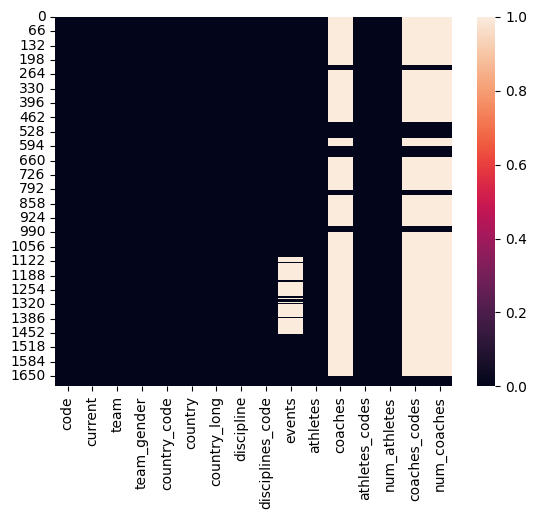

In [8]:
sns.heatmap(data.isnull())
plt.show()

In [10]:
data.drop(columns=['num_coaches'], inplace=True)

In [11]:
data.shape

(1698, 15)

In [14]:
# Also to drop row containing nan values use this
# data.dropna(inplace=True)

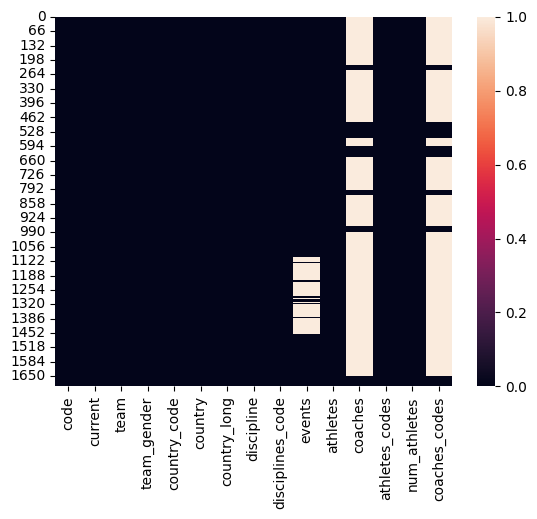

In [15]:
# Plot After dropping a column containing 85% null values 
sns.heatmap(data.isnull())
plt.show()

**Filling Categorical Data**

There are several methods to fill the data in the columns containing Nan values:
1. Backward Filling 
2. Forward Filling
3. Mode Filling

In [16]:
data.fillna(method='bfill', inplace=True)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_47332\67549027.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)


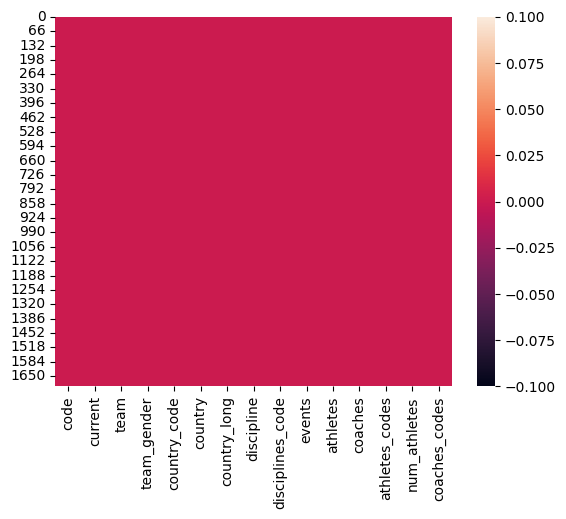

In [17]:
# Plot After using Backward Filling method 
sns.heatmap(data.isnull())
plt.show()

**Lets Use remaining two methods for demonstration**

In [18]:
# Forward Filling

# data.fillna(method='ffill', inplace=True)
# If you are having trouble in filling null values still after using these methods then use:
# data.fillna(method='ffill', axis=1, inplace=True)

**To find most frequent value in a cloumn**

In [20]:
data['code'].mode()[0]

'ARCMTEAM3---CHN01'

Now fill the value in the corresponding column

In [21]:
# data['code'].fillna(data['code'].mode()[0])

In [23]:
# Mode Filling for all columns at once

# 1. Find the coloumns with same dtypes

data.select_dtypes(include='object').columns



Index(['code', 'team', 'team_gender', 'country_code', 'country',
       'country_long', 'discipline', 'disciplines_code', 'events', 'athletes',
       'coaches', 'athletes_codes', 'coaches_codes'],
      dtype='object')

In [24]:
# 2. Now fill the mode in each column
for i in data.select_dtypes(include='object').columns:
    data[i].fillna(data[i].mode()[0], inplace=True)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_47332\3459127833.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[i].fillna(data[i].mode()[0], inplace=True)
